In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats

from auxiliar import applyUnderstandabilityMap, normalizeFeatures, removeEmpties, clip_readability


In [2]:
# Combination of all LM features and textual readability features (jst, bs4, nop)
#features_file = "./text_lm_features.csv" 
features_file = "./clef2016_metamap_chv_msh_html_text_features_allprocessing.txt"

# Qrels:
qrels = pd.read_csv("../qrels/clef16/doc_all.mean")
doc_features = pd.read_csv(features_file)

# preprocess datasets:
applyUnderstandabilityMap(qrels)
normalizeFeatures(doc_features)

merged = pd.merge(qrels, doc_features)
relevant = merged[merged["rel"] > 0]

relevant = removeEmpties(relevant)
# TODO: relevant = relevant[relevant["number_words"] > 0]

relevant = clip_readability(relevant)

labels = relevant["classunders"].sort_values()


Found number_words in number_words_jst_fp
Prefix: number_words Suffix: _jst_fp
Found number_syllables in number_syllables_jst_fp
Prefix: number_syllables Suffix: _jst_fp
Found number_polysyllable_words in number_polysyllable_words_jst_fp
Prefix: number_polysyllable_words Suffix: _jst_fp
Found difficult_words in difficult_words_jst_fp
Prefix: difficult_words Suffix: _jst_fp
Found longer_4 in longer_4_jst_fp
Prefix: longer_4 Suffix: _jst_fp
Found longer_6 in longer_6_jst_fp
Prefix: longer_6 Suffix: _jst_fp
Found longer_10 in longer_10_jst_fp
Prefix: longer_10 Suffix: _jst_fp
Found longer_13 in longer_13_jst_fp
Prefix: longer_13 Suffix: _jst_fp
Found prefixes_found in prefixes_found_jst_fp
Prefix: prefixes_found Suffix: _jst_fp
Found sufixes_found in sufixes_found_jst_fp
Prefix: sufixes_found Suffix: _jst_fp
Found acronyms_found in acronyms_found_jst_fp
Prefix: acronyms_found Suffix: _jst_fp
Found numbers_found in numbers_found_jst_fp
Prefix: numbers_found Suffix: _jst_fp
Found eng_found 

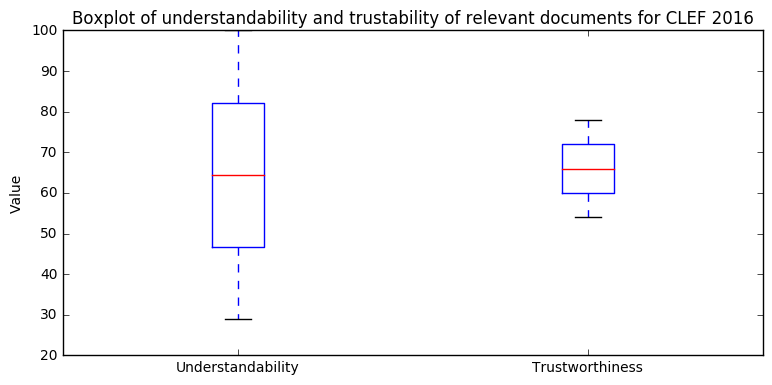

In [3]:
unders = relevant["unders"].values
trust = relevant["trust"].values
data = [unders, trust]

fig, ax1 = plt.subplots(figsize=(8, 5))
fig.canvas.set_window_title('A Boxplot Example')
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

plt.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)

ax1.set_axisbelow(True)
ax1.set_title('Boxplot of understandability and trustability of relevant documents for CLEF 2016')
ax1.set_ylabel('Value')

labels = ["Understandability", "Trustworthiness"]
plt.xticks([1,2], labels) 

plt.savefig("./graphics/boxplot_labels.pdf", dpi=300, transparent=True, frameon=False)


In [4]:
unders = relevant["unders"].sort_values()
n, bins, patches = plt.hist(unders, 100, normed=0, facecolor='green', alpha=0.75)

plt.xlabel('Understandability')
plt.ylabel('# Documents')
plt.title('Distribution of Understandability scores for CLEF 2016 (showing only relevant documents)')


plt.text(85, 210, "Harder", size=15, ha='center', va='center', color='b', alpha=0.7)
plt.text(15, 210, "Easier", size=15, ha='center', va='center', color='b', alpha=0.7)
plt.arrow(75, 200, 20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)
plt.arrow(25, 200, -20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)

plt.savefig("./graphics/hist_unders.pdf", dpi=300, transparent=True, frameon=False)


In [5]:
unders = relevant["trust"].sort_values()
n, bins, patches = plt.hist(unders, 100, normed=0, facecolor='green', alpha=0.75)

plt.xlabel('Trustworthiness')
plt.ylabel('# Documents')
plt.title('Distribution of Trustworthiness scores for CLEF 2016 (showing only relevant documents)')

plt.text(85, 210, "Higher", size=15, ha='center', va='center', color='b', alpha=0.7)
plt.text(15, 210, "Lower", size=15, ha='center', va='center', color='b', alpha=0.7)
plt.arrow(75, 200, 20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)
plt.arrow(25, 200, -20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)

plt.savefig("./graphics/hist_trust.pdf", dpi=300, transparent=True, frameon=False)


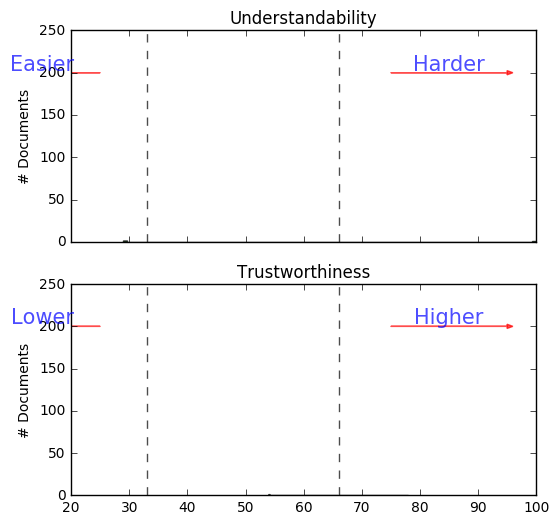

In [6]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(6, 6), sharex=True)

unders = relevant["unders"].sort_values()

n, bins, patches = ax0.hist(unders, 100, normed=0, facecolor='green', alpha=0.75)
ax0.set_title('Understandability')
ax0.set_ylabel('# Documents')
#plt.title('Distribution of Understandability scores for CLEF 2016 (showing only relevant documents)')

ax0.text(85, 210, "Harder", size=15, ha='center', va='center', color='b', alpha=0.7)
ax0.text(15, 210, "Easier", size=15, ha='center', va='center', color='b', alpha=0.7)
ax0.arrow(75, 200, 20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)
ax0.arrow(25, 200, -20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)

unders = relevant["trust"].sort_values()
n, bins, patches = ax1.hist(unders, 100, normed=0, facecolor='green', alpha=0.75)

#plt.xlabel('Trustworthiness')
ax1.set_ylabel('# Documents')
ax1.set_title('Trustworthiness')

ax1.text(85, 210, "Higher", size=15, ha='center', va='center', color='b', alpha=0.7)
ax1.text(15, 210, "Lower", size=15, ha='center', va='center', color='b', alpha=0.7)
ax1.arrow(75, 200, 20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)
ax1.arrow(25, 200, -20, 0, head_width=5, head_length=1, fc='r', ec='r', alpha=0.7)

ax1.plot([66,66],[0,250], 'k--', alpha=0.7)
ax1.plot([33,33],[0,250], 'k--', alpha=0.7)
ax0.plot([66,66],[0,250], 'k--', alpha=0.7)
ax0.plot([33,33],[0,250], 'k--', alpha=0.7)

plt.savefig("./graphics/hist_labels.pdf", dpi=300, transparent=True, frameon=False)


/home/palotti/venv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1903: RuntimeWarning: invalid value encountered in multiply
  lower_bound = self.a * scale + loc
/home/palotti/venv/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1904: RuntimeWarning: invalid value encountered in multiply
  upper_bound = self.b * scale + loc


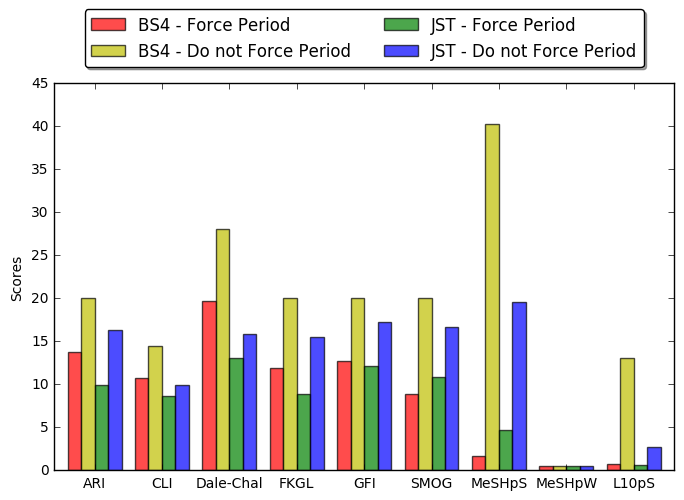

In [7]:

def get_interval(n):
    mu, sigma = n.mean(), n.std()
    down, up = stats.norm.interval(0.68, loc=mu, scale=sigma)
    return mu - down, up - mu

metrics = {}
metric_list = ["ari_index", "dale_chall_score", "coleman_liau_index", "flesch_kincaid_grade_level", 
              "gunning_fog_index", "smog_index", "mesh_found_per_sentence", "mesh_found_per_word",
              "longer_10_per_sentence",]
N = len(metric_list)
ind = np.arange(N)
width = 0.20

for preprocess in ["bs4", "jst"]:
    for period in ["fp", "nfp"]:
        metrics["%s_%s" % (preprocess, period)] = []
        for metric in metric_list:
            metrics["%s_%s" % (preprocess, period)].append(relevant["%s_%s_%s" % (metric, preprocess, period)].mean())

interval = {"up":{}, "down":{}}
for preprocess in ["bs4", "jst"]:
    for period in ["fp", "nfp"]:
        interval["up"]["%s_%s" % (preprocess, period)] = []
        interval["down"]["%s_%s" % (preprocess, period)] = []
        for metric in metric_list:
            interval["up"]["%s_%s" % (preprocess, period)].append(get_interval(relevant["%s_%s_%s" % (metric, preprocess, period)])[0])
            interval["down"]["%s_%s" % (preprocess, period)].append(get_interval(relevant["%s_%s_%s" % (metric, preprocess, period)])[1])
            

fig, ax = plt.subplots(figsize=(8, 5))

rects1 = ax.bar(ind            , metrics["bs4_fp"], width, color='r', alpha=0.7)
rects2 = ax.bar(ind + width    , metrics["bs4_nfp"], width, color='y', alpha=0.7)
rects3 = ax.bar(ind + 2 * width, metrics["jst_fp"], width, color='g', alpha=0.7)
rects4 = ax.bar(ind + 3 * width, metrics["jst_nfp"], width, color='b', alpha=0.7)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + 2* width)
ax.set_xticklabels(('ARI', 'CLI', 'Dale-Chal', 'FKGL', 'GFI', 'SMOG', 'MeSHpS', 'MeSHpW', 'L10pS'))
ax.set_xlim(-width, N)

lgd = ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('BS4 - Force Period', 'BS4 - Do not Force Period', 'JST - Force Period', 'JST - Do not Force Period'),
            loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=2, fancybox=True, shadow=True)

plt.savefig("./graphics/bar_raw_values.pdf", dpi=300, transparent=True, 
            frameon=False, bbox_extra_artists=(lgd,), bbox_inches='tight')


In [193]:
get_interval(relevant["dale_chall_score_bs4_fp"]), relevant["dale_chall_score_bs4_fp"].mean()

((6.0109443080306342, 10.071952387132221), 8.0414483475814276)

###### CLI : more stable
#relevant[["coleman_liau_index_jst_fp","coleman_liau_index_jst_nfp", "coleman_liau_index_bs4_fp", "coleman_liau_index_bs4_nfp"]].mean().plot("bar")

# ARI: less stable
relevant[["ari_index_jst_fp","ari_index_jst_nfp", "ari_index_bs4_fp", "ari_index_bs4_nfp"]].mean().plot("bar")



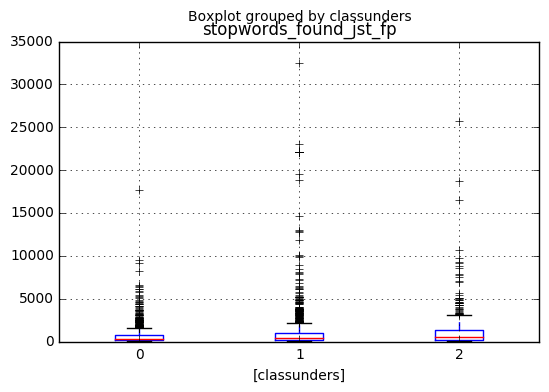

In [17]:
relevant[["classunders","stopwords_found_jst_fp"]].boxplot(by="classunders")

In [ ]:
relevant[["classunders","coleman_liau_index_jst_fp"]].boxplot(by="classunders")

In [ ]:
relevant[["classunders","coleman_liau_index_jst_fp","coleman_liau_index_jst_nfp","ari_index_jst_fp","ari_index_jst_nfp"]].boxplot(by="classunders")

In [ ]:
relevant[["classunders","ari_index_jst_fp","ari_index_jst_nfp"]].boxplot(by="classunders")

In [ ]:
for k in relevant.keys():
    if "ari_index" in k:
        relevant[k] > 15

In [ ]:
relevant[["classunders","dale_chall_score_jst_fp","dale_chall_score_jst_nfp"]].describe()

In [8]:

# Reads Goodman Kruskal resutls and plot graphs.
gkg = pd.read_csv("./gkg.csv") #.reset_index().rename(columns={"index":"metric", 0:"value"})

gkg["bs4"] = gkg["metric"].apply(lambda x: "bs4" in x)
gkg["jst"] = gkg["metric"].apply(lambda x: "jst" in x)
gkg["npro"] = gkg["metric"].apply(lambda x: "nopreprocess" in x)
gkg["fp"] = gkg["metric"].apply(lambda x: "fp" in x)
gkg["nfp"] = gkg["metric"].apply(lambda x: "nfp" in x)
gkg["pw"] = gkg["metric"].apply(lambda x: "per_word" in x)
gkg["ps"] = gkg["metric"].apply(lambda x: "per_sentence" in x)
gkg["html"] = gkg["metric"].apply(lambda x: x.startswith("n_"))


def clean(s):
    s = re.sub('_bs4', '', s)
    s = re.sub('_jst', '', s)
    s = re.sub('_nopreprocess', '', s)
    s = re.sub('_fp', '', s)
    s = re.sub('_nfp', '', s)
    s = re.sub('_per_word', '', s)
    s = re.sub('_per_sentence', '', s)
    return s
def clean_preprocess(s):
    s = re.sub('_bs4', '', s)
    s = re.sub('_jst', '', s)
    return s

gkg["root"] = gkg["metric"].apply(lambda x: clean(x))
gkg["metric_root"] = gkg["metric"].apply(lambda x: clean_preprocess(x))
gkg

,metric,value,bs4,jst,npro,fp,nfp,pw,ps,html,root,metric_root
0,acronyms_found_bs4,0.111256,True,False,False,False,False,False,False,False,acronyms_found,acronyms_found
1,acronyms_found_jst,0.130395,False,True,False,False,False,False,False,False,acronyms_found,acronyms_found
2,acronyms_found_nopreprocess,0.019782,False,False,True,False,False,False,False,False,acronyms_found,acronyms_found_nopreprocess
3,acronyms_found_per_sentence_bs4_fp,0.057484,True,False,False,True,False,False,True,False,acronyms_found,acronyms_found_per_sentence_fp
4,acronyms_found_per_sentence_bs4_nfp,0.045356,True,False,False,True,True,False,True,False,acronyms_found,acronyms_found_per_sentence_nfp
5,acronyms_found_per_sentence_jst_fp,0.077929,False,True,False,True,False,False,True,False,acronyms_found,acronyms_found_per_sentence_fp
6,acronyms_found_per_sentence_jst_nfp,0.079347,False,True,False,True,True,False,True,False,acronyms_found,acronyms_found_per_sentence_nfp
7,acronyms_found_per_sentence_nopreprocess,-0.104502,False,False,True,False,False,False,True,False,acronyms_found,acronyms_found_per_sentence_nopreprocess
8,acronyms_found_per_word_bs4_fp,0.047086,True,False,False,True,False,True,False,False,acronyms_found,acronyms_found_per_word_fp
9,acronyms_found_per_word_bs4_nfp,0.047086,True,False,False,True,True,True,False,False,acronyms_found,acronyms_found_per_word_nfp


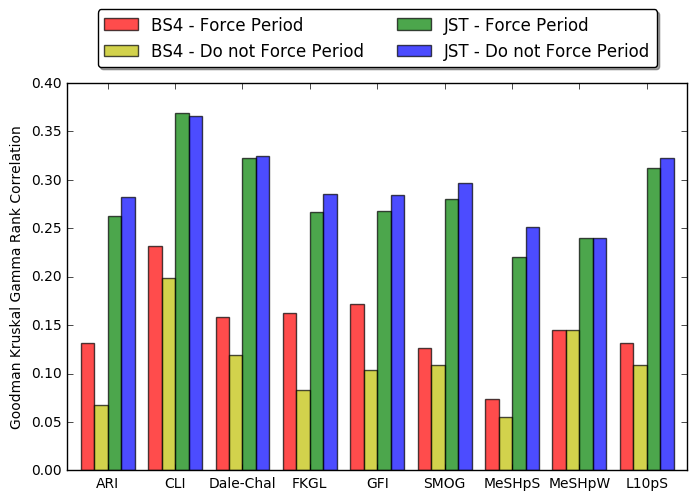

In [9]:
metrics = {}
metric_list = ["ari_index", "dale_chall_score", "coleman_liau_index", "flesch_kincaid_grade_level", 
              "gunning_fog_index", "smog_index", "mesh_found_per_sentence", "mesh_found_per_word",
              "longer_10_per_sentence",]
N = len(metric_list)
ind = np.arange(N)
width = 0.20

for preprocess in ["bs4", "jst"]:
    for period in ["fp", "nfp"]:
        metrics["%s_%s" % (preprocess, period)] = []
        for metric in metric_list:
            metrics["%s_%s" % (preprocess, period)].append(gkg[gkg["metric"] == "%s_%s_%s" % (metric, preprocess, period)]["value"].values[0])

            
fig, ax = plt.subplots(figsize=(8, 5))

rects1 = ax.bar(ind            , metrics["bs4_fp"], width, color='r', alpha=0.7)
rects2 = ax.bar(ind + width    , metrics["bs4_nfp"], width, color='y', alpha=0.7)
rects3 = ax.bar(ind + 2 * width, metrics["jst_fp"], width, color='g', alpha=0.7)
rects4 = ax.bar(ind + 3 * width, metrics["jst_nfp"], width, color='b', alpha=0.7)

# add some text for labels, title and axes ticks
ax.set_ylabel('Goodman Kruskal Gamma Rank Correlation')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + 2* width)
ax.set_xticklabels(('ARI', 'CLI', 'Dale-Chal', 'FKGL', 'GFI', 'SMOG', 'MeSHpS', 'MeSHpW', 'L10pS'))
ax.set_xlim(-width, N)

lgd = ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('BS4 - Force Period', 'BS4 - Do not Force Period', 'JST - Force Period', 'JST - Do not Force Period'),
            loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=2, fancybox=True, shadow=True)

plt.savefig("./graphics/bar_gkg_values.pdf", dpi=300, transparent=True, 
            frameon=False, bbox_extra_artists=(lgd,), bbox_inches='tight')



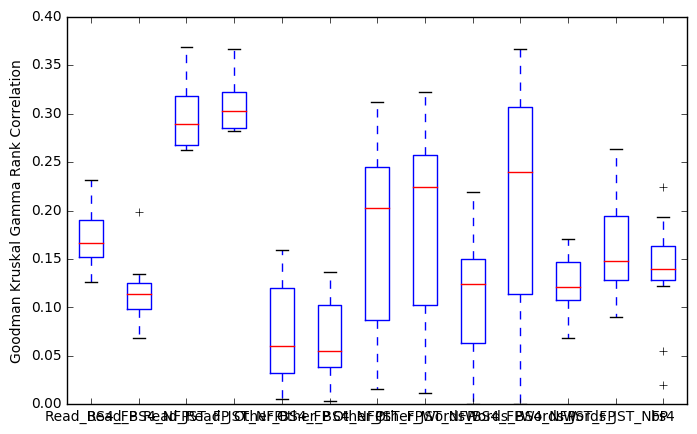

In [46]:
metrics = {}
metric_list = ["ari_index", "dale_chall_score", "coleman_liau_index", "flesch_kincaid_grade_level", 
              "gunning_fog_index", "smog_index","lix_index", "flesch_reading_ease"]
other = {}
other_list = ["sufixes_found_per_sentence", "stopwords_found_per_sentence", "prefixes_found_per_sentence",
             "numbers_found_per_sentence","number_words_per_sentence", "number_syllables_per_sentence",
             "number_polysyllable_words_per_sentence", "mesh_found_per_sentence", "longer_6_per_sentence",
             "longer_4_per_sentence", "longer_10_per_sentence", "longer_13_per_sentence","icd_found_per_sentence", 
              "eng_found_per_sentence", "drugbank_found_per_sentence", "difficult_words_per_sentence", 
              "chv_sum_per_sentence", "chv_num_per_sentence", "acronyms_found_per_sentence"]

words = {}
words_list = ["sufixes_found_per_word", "stopwords_found_per_word", "prefixes_found_per_word",
             "numbers_found_per_word","number_words_per_word", "number_syllables_per_word",
             "number_polysyllable_words_per_word", "mesh_found_per_word", "longer_6_per_word",
             "longer_4_per_word", "longer_10_per_word", "longer_13_per_word","icd_found_per_word", 
              "eng_found_per_word", "drugbank_found_per_word", "difficult_words_per_word", 
              "chv_sum_per_word", "chv_num_per_word", "acronyms_found_per_word"]

nothing = {}
nothing_list = ["sufixes_found", "stopwords_found", "prefixes_found",
             "numbers_found","number_words", "number_syllables",
             "number_polysyllable_words", "mesh_found", "longer_6",
             "longer_4", "longer_10", "longer_13","icd_found", 
              "eng_found", "drugbank_found", "difficult_words", 
              "chv_sum", "chv_num", "acronyms_found"]

N = len(metric_list)
ind = np.arange(N)
width = 0.20

for preprocess in ["bs4", "jst"]:
    for period in ["fp", "nfp"]:
        metrics["%s_%s" % (preprocess, period)] = []
        other["%s_%s" % (preprocess, period)] = []
        words["%s_%s" % (preprocess, period)] = []
        for metric in metric_list:
            metrics["%s_%s" % (preprocess, period)].append(abs(gkg[gkg["metric"] == "%s_%s_%s" % (metric, preprocess, period)]["value"].values[0]))
        for metric in other_list:
            other["%s_%s" % (preprocess, period)].append(abs(gkg[gkg["metric"] == "%s_%s_%s" % (metric, preprocess, period)]["value"].values[0]))
        for metric in words_list:
            words["%s_%s" % (preprocess, period)].append(abs(gkg[gkg["metric"] == "%s_%s_%s" % (metric, preprocess, period)]["value"].values[0]))

for preprocess in ["bs4", "jst", "nopreprocess"]:
    nothing["%s" % (preprocess)] = []
    for metric in nothing_list:
        nothing["%s" % (preprocess)].append(abs(gkg[gkg["metric"] == "%s_%s" % (metric, preprocess)]["value"].values[0]))
            
for preprocess in ["bs4", "jst"]:
    for period in ["fp", "nfp"]:
        metrics["%s_%s" % (preprocess, period)] = np.array(metrics["%s_%s" % (preprocess, period)])
        other["%s_%s" % (preprocess, period)] = np.array(other["%s_%s" % (preprocess, period)])
        words["%s_%s" % (preprocess, period)] = np.array(words["%s_%s" % (preprocess, period)])
for preprocess in ["bs4", "jst", "nopreprocess"]:
    nothing["%s" % (preprocess)] = np.array(nothing["%s" % (preprocess)])
        
fig, ax = plt.subplots(figsize=(8, 5))

data = [metrics["bs4_fp"], metrics["bs4_nfp"], metrics["jst_fp"], metrics["jst_nfp"],
        other["bs4_fp"], other["bs4_nfp"], other["jst_fp"], other["jst_nfp"],
        words["bs4_fp"], words["jst_fp"], nothing["bs4"], nothing["jst"], nothing["nopreprocess"]
       ]
ax.boxplot(data)

ax.set_xticklabels(('Read_BS4_FP','Read_BS4_NFP','Read_JST_FP','Read_JST_NFP',
                   'Other_BS4_FP','Other_BS4_NFP','Other_JST_FP','Other_JST_NFP',
                  'Words_BS4_FP','Words_BS4_NFP','Words_JST_FP','Words_JST_NFP',
                   'bs4','jst','no'))
ax.set_ylabel('Goodman Kruskal Gamma Rank Correlation')

# add some text for labels, title and axes ticks
#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind + 2* width)
#ax.set_xlim(-width, N)

#lgd = ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('BS4 - Force Period', 'BS4 - Do not Force Period', 'JST - Force Period', 'JST - Do not Force Period'),
#            loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=2, fancybox=True, shadow=True)

#plt.savefig("./graphics/bar_gkg_values.pdf", dpi=300, transparent=True, 
#            frameon=False, bbox_extra_artists=(lgd,), bbox_inches='tight')



In [25]:
metrics["bs4_fp"]

0.12524954316888209

In [115]:
gkg["avalue"] = gkg["value"].apply(lambda x: abs(x))
gkg.sort_values("avalue", ascending=False)[["metric","value"]].head(200)

,metric,value
53,classunders,1.000000
262,n_qs,-0.415032
264,n_qs_per_word_bs4_nfp,-0.413750
263,n_qs_per_sentence_bs4_nfp,-0.413700
25,chv_mean_jst,-0.384821
61,dale_chall_score_jst_fp,0.369157
74,difficult_words_per_word_jst_fp,0.366341
75,difficult_words_per_word_jst_nfp,0.366338
62,dale_chall_score_jst_nfp,0.366257
26,chv_mean_nopreprocess,-0.341403


Mean: 8.96 Median:  9


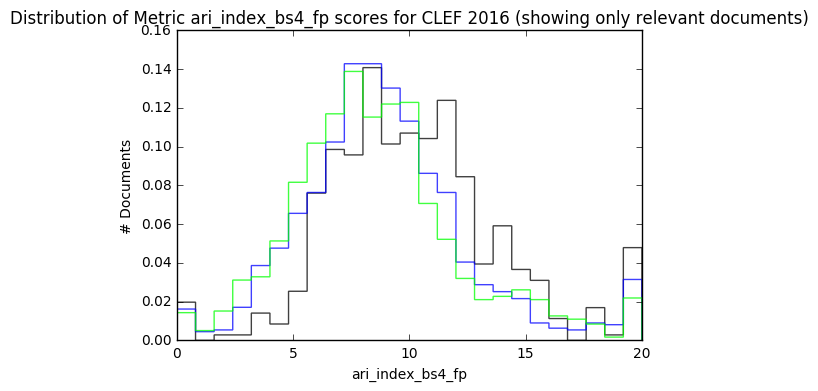

In [134]:
metric = "ari_index_bs4_fp"
data = relevant[[metric,"classunders"]].sort_values(by=metric)
data0 = data[data["classunders"] == 0][metric].values
data1 = data[data["classunders"] == 1][metric].values
data2 = data[data["classunders"] == 2][metric].values
data_to_plot = [data0, data1, data2]

n, bins, patches = plt.hist(data_to_plot, 25, normed=1, histtype='step', stacked=False, alpha=0.75, 
                            color=['lime','blue','k'], label=["Easy","Mid","Hard"], cumulative=False)
#plt.legend(prop={'size': 10})
plt.xlabel(metric)
plt.ylabel('# Documents')
plt.title('Distribution of Metric %s scores for CLEF 2016 (showing only relevant documents)' % (metric))

print "Mean: %.2f Median: %2.f" %(relevant[metric].mean(), relevant[metric].median())

Mean: 7.08 Median:  7


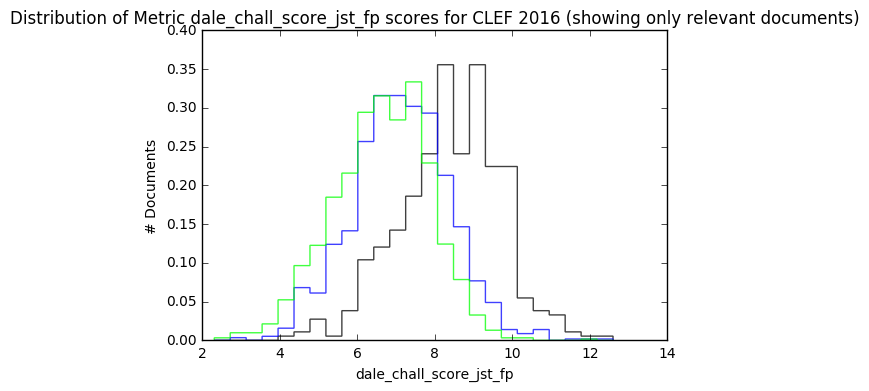

In [137]:
metric = "dale_chall_score_jst_fp"
data = relevant[[metric,"classunders"]].sort_values(by=metric)
data0 = data[data["classunders"] == 0][metric].values
data1 = data[data["classunders"] == 1][metric].values
data2 = data[data["classunders"] == 2][metric].values
data_to_plot = [data0, data1, data2]

n, bins, patches = plt.hist(data_to_plot, 25, normed=1, histtype='step', stacked=False, alpha=0.75, 
                            color=['lime','blue','k'], label=["Easy","Mid","Hard"], cumulative=False)
#plt.legend(prop={'size': 10})
plt.xlabel(metric)
plt.ylabel('# Documents')
plt.title('Distribution of Metric %s scores for CLEF 2016 (showing only relevant documents)' % (metric))

print "Mean: %.2f Median: %2.f" %(relevant[metric].mean(), relevant[metric].median())

In [117]:
plt.hist?